In [1]:
import requests
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

In [3]:
# Constraints of group C
mask = (df['location'] == 'Spain') | (df['location'] == 'Mexico') | (df['location'] == 'Netherlands') | (df['location'] == 'Brazil') | (df['location'] == 'Iran')
df[mask]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7439,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7440,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7441,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7442,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7443,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51351,ESP,Europe,Spain,2021-01-14,2211967.0,35878.0,26723.286,53079.0,201.0,200.571,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
51352,ESP,Europe,Spain,2021-01-15,2252164.0,40197.0,28829.143,53314.0,235.0,205.714,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
51353,ESP,Europe,Spain,2021-01-16,2252164.0,0.0,28829.143,53314.0,0.0,205.714,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
51354,ESP,Europe,Spain,2021-01-17,2252164.0,0.0,28829.143,53314.0,0.0,205.714,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891


In [4]:
# Pasando date a formato datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

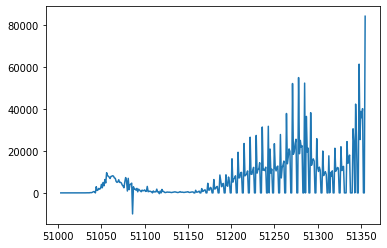

In [6]:
plt.plot(df[df['location'] == 'Spain']['new_cases'])

In [7]:
df.dtypes

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

In [8]:
a = df[mask].groupby('date').mean()[['total_cases']]
a

,total_cases
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2021-01-14,2868949.2
2021-01-15,2897614.8
2021-01-16,2916317.6


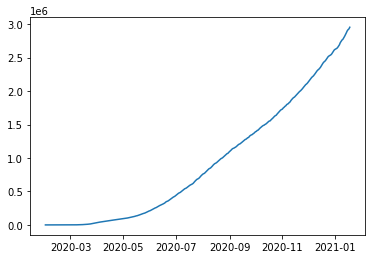

In [30]:
plt.plot(pd.read_json(a.to_json()))

In [13]:
def give_json(country1, country2, country3, country4, country5):
    # Importing library
    import pandas as pd
    # Getting url to import data
    url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
    df = pd.read_csv(url)
    # Constraints of group C
    mask = (df['location'] == country1) | (df['location'] == country2) | (df['location'] == country3) | (df['location'] == country4) | (df['location'] == country5)
    # Changing date series to datetime fromat
    df['date'] = pd.to_datetime(df['date'])
    a = df[mask].groupby('date').mean()[['total_cases']]
    a = a.rename(columns={"total_cases": "t_c_avg"})
    return a.to_json()
give_json('Spain', 'Iran', 'Brazil', 'Mexico', 'Netherlands')

In [14]:
give_json('Spain', 'Iran', 'Brazil', 'Mexico', 'Netherlands')

'{"t_c_avg":{"1577836800000":null,"1577923200000":null,"1578009600000":null,"1578096000000":null,"1578182400000":null,"1578268800000":null,"1578355200000":null,"1578441600000":null,"1578528000000":null,"1578614400000":null,"1578700800000":null,"1578787200000":null,"1578873600000":null,"1578960000000":null,"1579046400000":null,"1579132800000":null,"1579219200000":null,"1579305600000":null,"1579392000000":null,"1579478400000":null,"1579564800000":null,"1579651200000":null,"1579737600000":null,"1579824000000":null,"1579910400000":null,"1579996800000":null,"1580083200000":null,"1580169600000":null,"1580256000000":null,"1580342400000":null,"1580428800000":null,"1580515200000":1.0,"1580601600000":1.0,"1580688000000":1.0,"1580774400000":1.0,"1580860800000":1.0,"1580947200000":1.0,"1581033600000":1.0,"1581120000000":1.0,"1581206400000":2.0,"1581292800000":2.0,"1581379200000":2.0,"1581465600000":2.0,"1581552000000":2.0,"1581638400000":2.0,"1581724800000":2.0,"1581811200000":2.0,"1581897600000":